# SQL - Menganalisis Minat Baca pada Database Aplikasi Buku Online

Virus corona yang kehadirannya mengejutkan seluruh dunia telah mengubah rutinitas harian semua orang.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀢󠀳󠀰 Kini, warga kota tidak lagi menghabiskan waktu luangnya di luar rumah seperti pergi ke kafe dan mal. Mereka lebih sering berada di rumah, menghabiskan waktunya dengan membaca buku.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀣󠀳󠀰 Hal ini pun mendorong perusahaan startup untuk mengembangkan aplikasi baru bagi para pecinta buku.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀤󠀳

󠀰Kamu telah diberi sebuah database dari salah satu perusahaan yang bersaing dalam industri ini.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀥󠀳󠀰 Database tersebut berisi data tentang buku, penerbit, penulis, serta rating dan ulasan pelanggan atas buku terkait.󠀲󠀡󠀠󠀦󠀥󠀨󠀧󠀦󠀳󠀰 Informasi ini akan digunakan dalam membuat penawaran harga untuk sebuah produk baru.

Tujuan : Mengidentifikasi profil buku penjualan berdasarkan review dan rating dari pelanggan dalam membuat penawaran harga untuk sebuah produk baru.

## Deskripsi Data

Dataframe `df_books` memuat:
   - `book_id` — ID buku
   - `author_id` — ID penulis
   - `title` — Judul buku
   - `num_pages` — Jumlah halaman
   - `publication_date` — Tanggal penerbitan
   - `publisher_id` — ID penerbit
   
Dataframe `df_authors` memuat:
   - `author_id` — ID penulis
   - `author` — Nama penulis
   
Dataframe `df_publishers` memuat:
   - `publisher_id` — ID penerbit
   - `publisher` — Nama penerbit

Dataframe `df_ratings` memuat:
   - `rating_id` — ID rating
   - `book_id` — ID buku
   - `username` — Nama pengguna yang memberi rating buku
   - `rating` — ID buku

Dataframe `df_reviews` memuat:
   - `review_id` — ID ulasan
   - `book_id` — ID buku
   - `username` — Nama pengguna yang mengulas buku
   - `text` — Teks ulasan

## Read Connection From PSQL DB

get data dari database melalui SQL

In [1]:
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'practicum_student',
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs',
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': '6432',
             'db': 'data-analyst-final-project-db'}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
query_1 = """SELECT * FROM public.books;"""
query_2 = """SELECT * FROM public.authors;"""
query_3 = """SELECT * FROM public.publishers;"""
query_4 = """SELECT * FROM public.ratings;"""
query_5 = """SELECT * FROM public.reviews;"""

## Inisialisasi Libray

Import library untuk visualisasi

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Memuat data

In [4]:
df_books = pd.io.sql.read_sql(query_1, con = engine)
df_authors = pd.io.sql.read_sql(query_2, con = engine)
df_publishers = pd.io.sql.read_sql(query_3, con = engine)
df_ratings = pd.io.sql.read_sql(query_4, con = engine)
df_reviews = pd.io.sql.read_sql(query_5, con = engine)

## Mengenal Data

### Books

In [5]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [6]:
df_books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [7]:
df_books.duplicated().sum()

0

In [8]:
df_books.isnull().sum()

book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64

### Authors

In [9]:
df_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [10]:
df_authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [11]:
df_authors.duplicated().sum()

0

In [12]:
df_authors.isnull().sum()

author_id    0
author       0
dtype: int64

### Publishers

In [13]:
df_publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [14]:
df_publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [15]:
df_publishers.duplicated().sum()

0

In [16]:
df_publishers.isnull().sum()

publisher_id    0
publisher       0
dtype: int64

### Ratings

In [17]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [18]:
df_ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [19]:
df_ratings.duplicated().sum()

0

In [20]:
df_ratings.isnull().sum()

rating_id    0
book_id      0
username     0
rating       0
dtype: int64

### Reviews

In [21]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


In [22]:
df_reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [23]:
df_reviews.duplicated().sum()

0

In [24]:
df_reviews.isnull().sum()

review_id    0
book_id      0
username     0
text         0
dtype: int64

## Menganalisis Data

### Hitung jumlah buku yang dirilis setelah tanggal 1 Januari 2000

Mengambil data melalui query SQL untuk dataset books dimana tanggal rilis setelah 1 Januari 2000

In [25]:
query = """
SELECT *
FROM public.books 
WHERE publication_date > '2000-01-01';"""

In [26]:
books = pd.io.sql.read_sql(query, con = engine)

In [27]:
books

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
814,994,408,World War Z: An Oral History of the Zombie War,342,2006-09-12,68
815,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
816,998,201,Year of Wonders,358,2002-04-30,212
817,999,94,You Suck (A Love Story #2),328,2007-01-16,331


In [28]:
len(books)

819

Terdapat sejumlah 819 buku

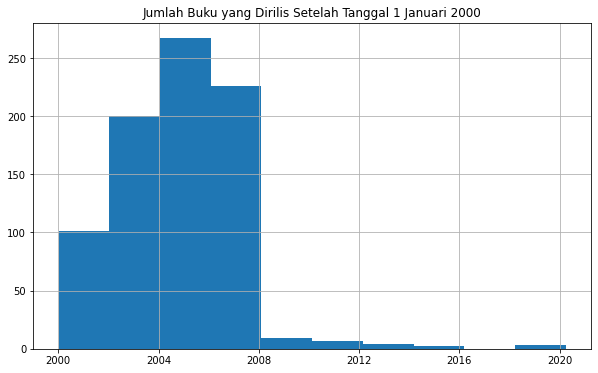

In [29]:
plt.figure(figsize=(10, 6))
plt.title('Jumlah Buku yang Dirilis Setelah Tanggal 1 Januari 2000')
books['publication_date'].hist(bins=10)
plt.show()

Jumlah buku rilis:
- Terlihat paling banyak buku dirilis pada tahun 2000 - 2008, pada tahun 2005 dengan total rilis kisaran 270 buku.
- Tiba-tiba terjadi penurunan yang ekstrem setelah tahun 2008 hingga tahun 2020

### Hitung jumlah ulasan pengguna dan rating rata-rata untuk setiap buku.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀠

Mengambil data pada dataset review yang di join dengan rating untuk mencari tahu jumlah ulasan dan nilai rata-rata ratingnya.

In [ ]:
query = """
SELECT 
    books.title
    , subquery.avg_rating
    , subquery.review_count
FROM 
    (SELECT
         reviews.book_id AS book_id
         , COUNT (DISTINCT reviews.review_id) AS review_count
         , AVG (ratings.rating) AS avg_rating
     FROM
         reviews
         INNER JOIN ratings ON ratings.book_id = reviews.book_id
     GROUP BY
         reviews.book_id
     ORDER BY
         review_count DESC
         , avg_rating DESC) AS subquery
     INNER JOIN books ON subquery.book_id = books.book_id
ORDER BY
    review_count DESC
    , avg_rating DESC
LIMIT 10;"""

In [31]:
reviews_rating = pd.io.sql.read_sql(query, con = engine)
reviews_rating

,book_id,count_reviews,mean_ratings
0,1,6,3.666667
1,2,2,2.500000
2,3,9,4.666667
3,4,4,4.500000
4,5,24,4.000000
...,...,...,...
989,996,9,3.666667
990,997,15,3.400000
991,998,20,3.200000
992,999,4,4.500000


Setiap buku memiliki nilai ulasan yang beragam ada yang bernilai satuan hingga puluhan. Sedangkan pada nilai rata-ratanya rating perbedaannya tidak terpaut jauh untuk setiap bukunya.

### Identifikasi penerbit yang telah menerbitkan jumlah buku terbanyak dengan jumlah halaman lebih dari 50 (hal ini akan membantumu dalam mengecualikan brosur dan publikasi serupa dari analisismu)

Pertama kita ambil data dari books untuk kita iris datanya berdasarkan 50 lebih jumlah halaman bukunya, lalu kita join dengan dataset publisher untuk mencari tahu jumlah penerbit terbanyak.

In [34]:
query = """
SELECT 
    DISTINCT(publishers.publisher) AS publisher
    , COUNT(subquery.publisher_id)
FROM 
    publishers
    RIGHT JOIN (SELECT *
                FROM books
                WHERE num_pages > 50) AS subquery ON subquery.publisher_id = publishers.publisher_id
GROUP BY publishers.publisher
ORDER BY
    COUNT(subquery.publisher_id) DESC
LIMIT 10;"""

In [35]:
count_publisher = pd.io.sql.read_sql(query, con = engine)
count_publisher

,publisher,count
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,Berkley Books,14
8,St. Martin's Press,14
9,Delta,13


In [36]:
query = """
SELECT 
    DISTINCT(publishers.publisher) AS publisher
    , COUNT(subquery.publisher_id)
FROM 
    publishers
    RIGHT JOIN (SELECT *
                FROM books
                WHERE num_pages < 50) AS subquery ON subquery.publisher_id = publishers.publisher_id
GROUP BY publishers.publisher
ORDER BY
    COUNT(subquery.publisher_id) DESC;"""

In [37]:
pd.io.sql.read_sql(query, con = engine)

,publisher,count
0,Atheneum Books for Young Readers,1
1,Brilliance Audio,1
2,Dover Publications,1
3,Golden Books,1
4,Golden/Disney,1
5,HarperCollins,1
6,Simon & Schuster Childrens Books,1
7,Tanglewood,1


Sepertinya buku yang memiliki jumlah halaman kurang dari 50 hanya 8 buku saja.

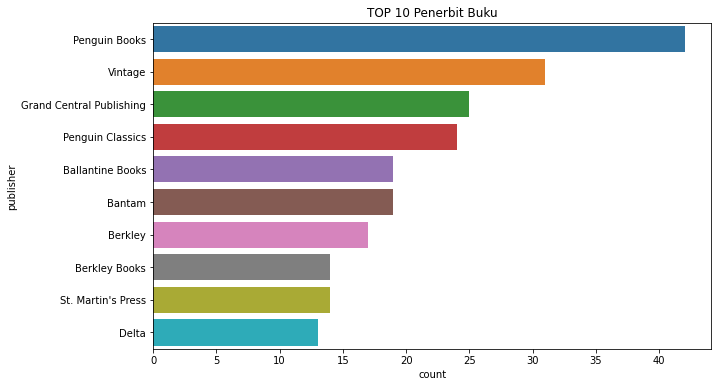

In [38]:
plt.figure(figsize=(10, 6))
plt.title('TOP 10 Penerbit Buku')
sns.barplot(data=count_publisher, x='count', y='publisher')
plt.show()

TOP 10 Penerbit Buku:
- Penguin Books merupakan penerbit paling banyak dengan berjumlahkan 42 terbitan
- Penerbit peringkat ke-10 ada  Delta dengan 13 terbitan buku

### Identifikasi penulis dengan rating rata-rata buku tertinggi: temukan buku dengan rating minimal 50.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀢󠀳

Kita query berdasarkan books untuk dataset authors dan ratings guna mencari titik tengah bertemunya dataset untuk di analisis. Lalu kita iris nilainya berdasarkan hasil penjumlahan rating yang lebih dari 50 rating.

In [ ]:
query = """
SELECT
    authors.author
    , AVG (subquery2.avg_rating) AS final_avg
FROM
    (SELECT
        books.title
        , books.author_id
        , subquery1.avg_rating
    FROM
        (SELECT
            book_id
            , COUNT(rating_id) AS rating_cnt
            , AVG(rating) AS avg_rating
        FROM
            ratings
        GROUP BY
            book_id
        HAVING 
            COUNT (rating_id) > 50) AS subquery1
        INNER JOIN books ON books.book_id = subquery1.book_id) AS subquery2
    INNER JOIN authors ON authors.author_id = subquery2.author_id
GROUP BY
    author
ORDER BY
    final_avg DESC
LIMIT 5"""

In [40]:
author_rating = pd.io.sql.read_sql(query, con = engine)
author_rating

,author,rating
0,Betty Smith,51
1,Art Spiegelman,52
2,Shel Silverstein,53
3,Gail Carson Levine,53
4,Haruki Murakami/Philip Gabriel,53
5,Cornelia Funke/Anthea Bell,54
6,Kazuo Ishiguro,55
7,Lewis Carroll/Jane Carruth/Rene Cloke,55
8,Lewis Carroll/John Tenniel/Martin Gardner,56
9,Erik Larson/Tony Goldwyn,56


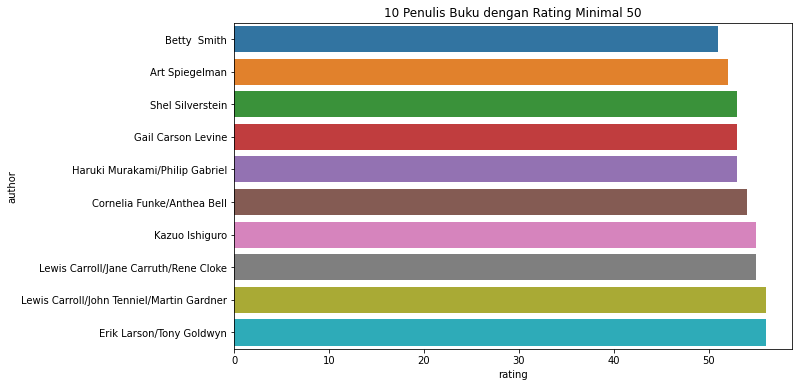

In [41]:
plt.figure(figsize=(10, 6))
plt.title('10 Penulis Buku dengan Rating Minimal 50')
sns.barplot(data=author_rating, x='rating', y='author')
plt.show()

10 Penulis Buku dengan Rating Minimal 50:
- Dengan jumlah nilai rating 51 ada Penulis buku bernama Betty Smith.

### Hitung jumlah rata-rata teks ulasan di antara pengguna yang memberi rating terhadap lebih dari 50 buku.

Kita query berdasarkan books, reviews, dan ratings untuk di joinkan. Lalu kita iris nilainya berdasarkan jumlah rata-rata teks ulasan di antara pengguna yang memberi rating terhadap lebih dari 50 buku.

In [ ]:
query = """
SELECT
    AVG (subquery2.review_cnt) AS avg_review_cnt
FROM
    (SELECT
        COUNT (reviews.review_id) AS review_cnt
        , subquery1.username
    FROM
        (SELECT
            username
            , COUNT (rating_id) AS rating_cnt
        FROM
            ratings
        GROUP BY
            username
        HAVING
            COUNT (rating_id) > 50) AS subquery1
        INNER JOIN reviews ON reviews.username = subquery1.username
    GROUP BY
        subquery1.username) AS subquery2"""

In [43]:
text_rating = pd.io.sql.read_sql(query, con = engine)
text_rating

,username,books,text,rating
0,wknight,62,18,238
1,brentpowers,65,17,246
2,ashleymalone,63,12,249
3,wsingleton,68,13,256
4,samuel96,66,11,259
5,znelson,68,12,265
6,nthomas,70,16,272
7,joe06,71,12,280
8,alison92,74,14,294
9,charlesraymond,78,16,306


In [44]:
text_rating['text'].mean()

14.1

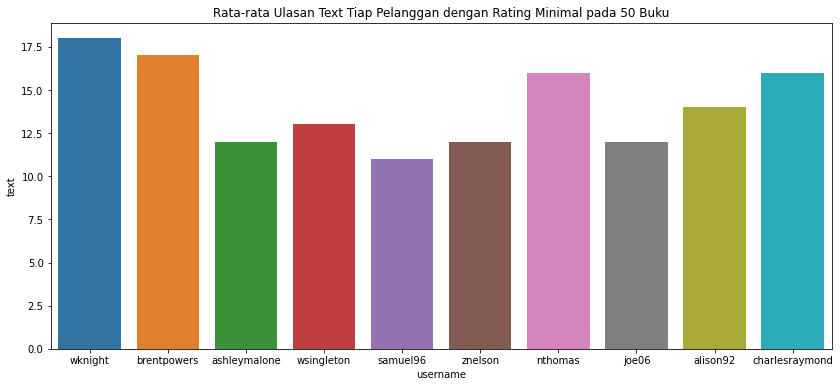

In [45]:
plt.figure(figsize=(14, 6))
plt.title('Rata-rata Ulasan Text Tiap Pelanggan dengan Rating Minimal pada 50 Buku')
sns.barplot(data=text_rating, x='username', y='text')
plt.show()

Reviews text:
- Sepertinya wknight merupakan pelanggan yang paling banyak memberikan ulasan dengan jumlah rata-rata di 18 ulasan.
- Pemberian reviews dan rating untuk 50 buku lebih ini merupakan pelanggan loyal dan perlu kita apresiasi.

## Kesimpulan Umum

Kesimpulan secara menyeluruh berdasarkan poin-poin penting pada setiap tahap analisis.

Jumlah buku rilis:
- Terlihat paling banyak buku dirilis pada tahun 2000 - 2008, pada tahun 2005 dengan total rilis kisaran 270 buku.
- Tiba-tiba terjadi penurunan yang ekstrem setelah tahun 2008 hingga tahun 2020 

Jumlah ulasan:
- Secara keseluruhan nilai ulasan sebanyak 26167 dan rata-rata ratingnya adalah 3.9
- Setiap buku memiliki nilai ulasan yang beragam ada yang bernilai satuan hingga puluhan. Sedangkan pada nilai rata-ratanya rating perbedaannya tidak terpaut jauh untuk setiap bukunya. 

TOP 10 Penerbit Buku:
- Penguin Books merupakan penerbit paling banyak dengan berjumlahkan 42 terbitan
- Penerbit peringkat ke-10 ada  Delta dengan 13 terbitan buku

10 Penulis Buku dengan Rating Minimal 50:
- Dengan jumlah nilai rating 51 ada Penulis buku bernama Betty Smith.

Reviews text:
- Sepertinya wknight merupakan pelanggan yang paling banyak memberikan ulasan dengan jumlah rata-rata di 18 ulasan.
- Pemberian reviews dan rating untuk 50 buku lebih ini merupakan pelanggan loyal dan perlu kita apresiasi.

Melihat dari jumlah buku serta penerbitan yang cukup banyak ini mengindikasikan bahwa peminat daripada pelanggan terhadap membaca buku masih tetap tinggi. Dapat diperkuat asumsi yang kita miliki dengan menyimpulkan pada penilaian dari pelanggan juga masih positif atau baik dari nilai kuantitasnya.